# Projections onto Subspaces

<https://www.youtube.com/watch?v=Y_Ac6KiQ1t0&t=2s>



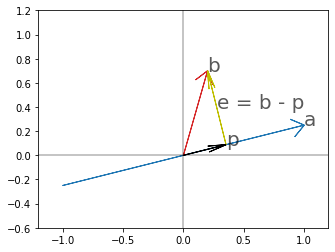

In [1]:
import pylinearalgebra.vistools as vist
xy = vist.XY(x_lim=(-1.2, 1.2), y_lim=(-0.6, 1.2))
xy.vector(
    (-1, -0.25), (1, 0.25), to_text='a', head_length=0.1)
xy.vector((0, 0), (0.2, 0.7), to_text='b', head_length=0.1)
xy.vector(
    (0.35294, 0.08823520), 
    (0.2, 0.7), 
    shaft_text='e = b - p', 
    head_width=0.05,
    head_length=0.15
)
xy.vector(
    (0, 0),
    (0.35294, 0.08823520),
    to_text='p',
    head_width=0.05,
    head_length=0.15
)

## motivation in $R^2$

find the projection of $a$ on $b$, i.e. find the point on line $b$
that is the closest to $a$

e: the error vector

$p = x a$, to find $x$, a scalar, I must use the key fact: the orthogonality

$a^{T} p = 0\\
a^{T} (b - xa) = 0\\
x \ a^{T} a = a^{T} b\\
x = \frac{a^{T}b}{a^{T}a}$

### the projection matrix

$proj_{p} = P b$

format the above formula on $x$ to the matrix form I get:

$P = \frac{a a^{T}}{a^{T}a}$

note, the terms DO NOT cancel!! it should rather be written in
terms of the inverse: $P = (a a^{T})^{-1} {a^{T}a}$

recall that $a^{T}a$ is a number (the length of $a$ sqrt)

whereas $a a^{T}$ is a column times a row, which is a N x N matrix!!

### the properties of the projection matrix

rank of $P$, $C(P)$ ? (recall what is a colspace: mult this matrix
by a vector, result in a vector still in the colspace)

colspace is the line of $a$

and its rank is 1 (recall $P$ is formed by col x row, **which is
a lin-comb of the column**, hence col is the basis of $C(P)$ and
**its rank is 1**, **review: 18.06_11 - rank 1 matrices**)

is $P$ symmetric? yes $P^{T} = P$, quick proof: $P$ is essentially a matrix $a a^{T}$ over a scalar value, and $a a^{T}$ itself is symmetric. It is the **property no. 1**

projecting b twice results in the same p

$P^{2} = P$, **property no.2**

## moving on to $R^n$

### why project ?

to deal with equations $Ax = b$ that may have no solutions, $Ax$ has to be in $C(A)$ while $b$ may not be

what can I do ? I solve the closest problem to $Ax = b$

and what is the closest problem ? the closest vector in $C(A)$

instead, I solve $A\hat{x} = p$, $p$ is the projection of $b$ onto
$C(A)$

emphasizing $\hat{x} \ne x$, $\hat{x}$ is not the solution (as 
it does not exist!), it is the best possible closest solution

### example in 3D

to project a vector $\overrightarrow{b}$ on to a plane of
$\overrightarrow{a_{1}}, \overrightarrow{a_{2}}$ and get $p$

the plane is 
$A = \begin{bmatrix}\\ a_{1} & a_{2}\\ \\ \end{bmatrix}$

and $e = b - p, e \perp \text{plane}$

therefore the problem is, 
$p = A \hat{x}$ and find $\hat{x}$,
using the key fact: $(b - A \hat{x}) \perp \text{plane of a1,a2}$

therefore here are the two equations:

$a_{1}^{T}(b - A\hat{x}) = 0\\
a_{2}^{T}(b - A\hat{x}) = 0$

I get turn them into the matrix form

$\begin{bmatrix}
a_1^{T} \\
a_2^{T}
\end{bmatrix} (b - A \hat{x}) =
\begin{bmatrix}
0 \\
0
\end{bmatrix}$

which is 

$A^{T}(b - A\hat{x}) = 0$

note that $b - A\hat{x}$ is $e$, the error vector

shuffle the terms of the equation I get:

$A^{T}A \hat{x} = A^{T} b$

review the 1-D case: $a^{T} a \hat{x} = a^{T} b$

### the properties of the error vector

what subspace is $e$ in? because $A^{T} e = 0$, $e$ in $N(A^{T})$

recall the big picture of linear alegbra:

$C(A) \perp N(A^{T})$

therefore, I conclude that, $e \perp C(A)$

### the solution to compute the projection

#### what is $\hat{x}$ ?

$\hat{x} = (A^{T}A)^{-1} A^{T} b$

#### what is the projected vector $p$?

$p = A\hat{x} = A(A^{T}A)^{-1}A^{T}b$


#### what is the projection matrix $A$?

$P = A(A^{T}A)^{-1}A^{T}$

note I can not rearrange RHS to $AA^{-1} \dots$, which becomes
identity $I$, because $A$ is not
invertible (it's not even square in the 3-D case)

therefore I have to leave RHS exactly in this form

if $A$ were invertible, the meaning of the projection becomes:

to project $b$ on to a whole space $R^{n}$, which results in
the identity $I$

## application of projection


### least squares fitting by a line

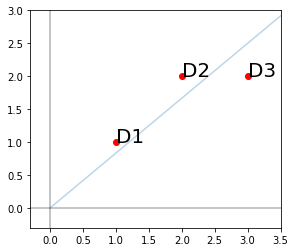

In [9]:
import pylinearalgebra.vistools as vist

xy = vist.XY(x_lim=(-0.3, 3.5), y_lim=(-0.3, 3))
xy.line((0, 0), (30, 25), alpha=0.3)
xy.point((1, 1, 'D1'), color='r')
xy.point((2, 2, 'D2'), color='r')
xy.point((3, 2, 'D3'), color='r')

problem: to find the line that is closet to `{(1, 1), (2, 2), (3, 2)}`

i.e the error vectors `e1, e2, e3` are the smallest I can get

let the $x, y$ axes be $t, D$ ($t$ for time, $D$ for data),

$b = C + D t$

I can think that there were an imaginary line that goes through
all the given points, of course this line does not exist, but 
then the equations can be written as:

$
c + d = 1 \\
c + 2d = 2 \\
c + 3d = 2
$

where $c$ is a constant scalar, $d$ is the unknown with $t$ values
plugged in, and $b$ is the RHS with $D$ values plugged in 

in the matrix form $Ax = b$

$
\begin{bmatrix}
1 & 1 \\ 1 & 2 \\ 1 & 3
\end{bmatrix}
\begin{bmatrix}c \\ d\end{bmatrix}
= \begin{bmatrix}1 \\ 2 \\ 2\end{bmatrix}
$

this is the linear system that has no solution but its projection
is what we are after - the "best" solution that is closest to the given points

# Recitation and Exercises

<https://www.youtube.com/watch?v=t-n4a18AW08>